In [4]:
import pandas as pd

df = pd.read_csv("./data/mnist/mnist.csv")

In [5]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(10000, 785)

In [7]:
X = df.iloc[:, 1:].copy()
y = df.iloc[:, 0].copy()

In [8]:
X.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64

In [10]:
X = X.to_numpy()
X = X.astype('float32') / 255

In [11]:
import numpy as np
X = np.reshape(X, (X.shape[0], 28, 28, 1))

In [12]:
28*28

784

In [13]:
14*14*4

784

In [14]:
X[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [77]:
X.shape

(10000, 28, 28, 1)

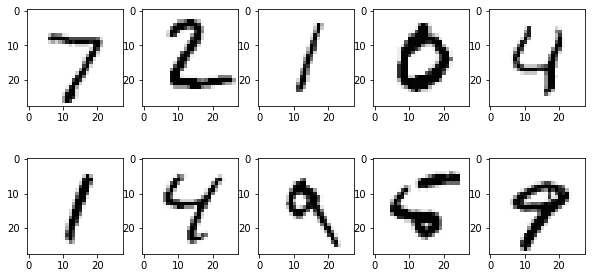

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i].reshape((28, 28)), 
               cmap='Greys')
plt.show()

In [80]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

In [81]:
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [82]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)

In [90]:
X_tn.shape

(7500, 28, 28, 1)

In [91]:
y_tn.shape

(7500, 10)

In [83]:
# 합성곱 신경망 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout

n_class = len(y_tn[0])

model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), 
                 input_shape=(28,28,1), 
                 padding='valid', 
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=(3,3), 
                 padding='valid', 
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_class, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)              

In [85]:
# 모형 컴파일
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [86]:
hist = model.fit(X_tn, y_tn, epochs=3, batch_size=100)

Epoch 1/3
75/75 [==============================] - 3s 34ms/step - loss: 0.7568 - accuracy: 0.7535
Epoch 2/3
75/75 [==============================] - 3s 38ms/step - loss: 0.2005 - accuracy: 0.9396
Epoch 3/3
75/75 [==============================] - 3s 43ms/step - loss: 0.1359 - accuracy: 0.9565


In [87]:
print(model.evaluate(X_tn, y_tn)[1])

235/235 [==============================] - 1s 4ms/step - loss: 0.0711 - accuracy: 0.9765
0.9765333533287048


In [88]:
# 테스트 데이터 평가
print(model.evaluate(X_te, y_te)[1])

79/79 [==============================] - 0s 3ms/step - loss: 0.0851 - accuracy: 0.9752
0.9751999974250793
